# Iris Flower Prediction

The Iris dataset is a popular dataset for machine learning and data analysis. It consists of 150 rows of data,
with each row representing the measurements of a different iris flower. The dataset includes the following four features:

    Sepal Length: The length of the sepal, which is the part of the flower that surrounds the petals.
    Sepal Width: The width of the sepal.
    Petal Length: The length of the petals.
    Petal Width: The width of the petals.

In addition to these features, the dataset also includes a target variable that indicates the type of iris flower represented
by the data. There are three possible classes: Setosa, Versicolor, and Virginica.

The Iris dataset is often used as a benchmark for machine learning algorithms, as it is small,
well-defined, and easy to work with. It is available 
for download on Kaggle at the following link: https://www.kaggle.com/uciml/iris.

The Iris dataset was first introduced by Ronald Fisher, a British statistician and biologist,
in his 1936 paper "The use of multiple measurements in taxonomic problems." 
It has since become a widely-used dataset in the field of machine learning and data analysis.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings as wg


In [7]:
wg.filterwarnings('ignore')

In [8]:
df = pd.read_csv('C:/Users/nisha/OneDrive/Desktop/BigData/ML/Iris.csv')


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.drop(['Id'],axis = 1,inplace=True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
df.shape

(150, 5)

In [14]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [101]:
df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']
df_virginica = df[df['Species'] == 'Iris-virginica']

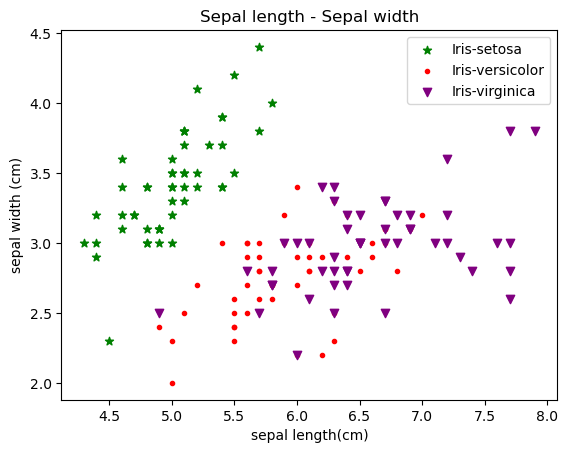

In [113]:
plt.scatter(df_setosa["SepalLengthCm"],df_setosa["SepalWidthCm"],color="green",marker="*")
plt.scatter(df_versicolor["SepalLengthCm"],df_versicolor["SepalWidthCm"],color="red",marker=".")
plt.scatter(df_virginica["SepalLengthCm"],df_virginica["SepalWidthCm"],color="purple",marker="v")

plt.title("Sepal length - Sepal width")
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

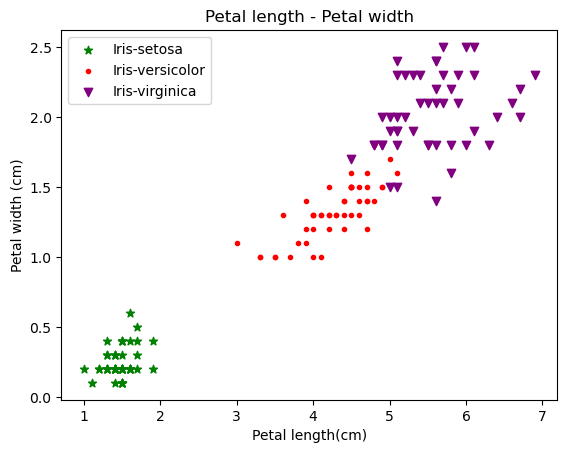

In [112]:
plt.scatter(df_setosa["PetalLengthCm"],df_setosa["PetalWidthCm"],color="green",marker="*")
plt.scatter(df_versicolor["PetalLengthCm"],df_versicolor["PetalWidthCm"],color="red",marker=".")
plt.scatter(df_virginica["PetalLengthCm"],df_virginica["PetalWidthCm"],color="purple",marker="v")

plt.title("Petal length - Petal width")
plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [17]:
#split the dataset into features and target variables
x = df.iloc[:,:-1].values   
y = df.iloc[:,-1].values 

In [18]:
# split the dataset into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

In [19]:
# Noramalization
# standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


## KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_knn =KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [21]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [22]:
score = accuracy_score(y_test,y_pred)
score

0.9777777777777777

In [23]:
result = confusion_matrix(y_test,y_pred)
result

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

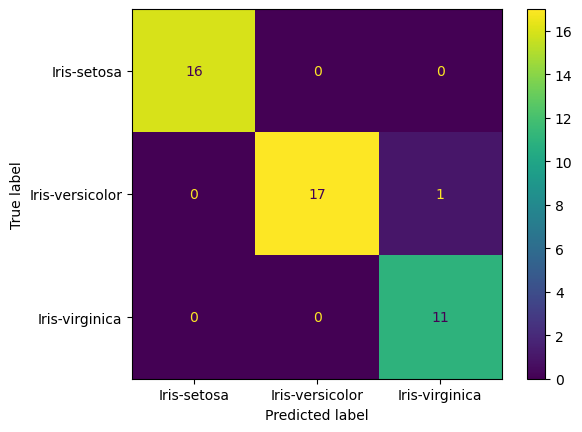

In [24]:
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
c_matrix_display = ConfusionMatrixDisplay(result,display_labels=label)
c_matrix_display.plot()

In [25]:
print(classification_report(y_test,y_pred, target_names=label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Random Forest Model

In [44]:
# split the dataset into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [45]:
# Noramalization
# standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [117]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [118]:
score = accuracy_score(y_test,y_pred)
score

0.9555555555555556

In [119]:
result = confusion_matrix(y_test,y_pred)
result

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

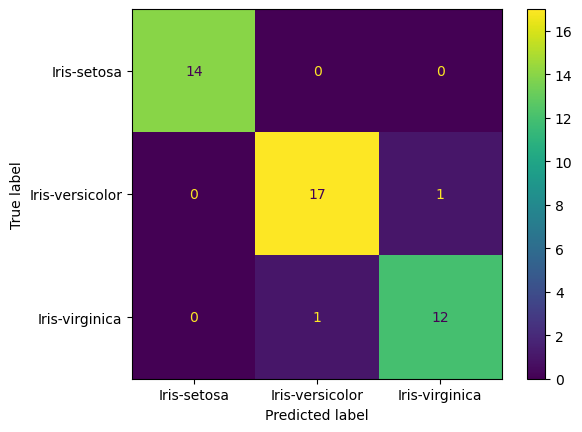

In [120]:
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
c_matrix_display = ConfusionMatrixDisplay(result,display_labels=label)
c_matrix_display.plot()

In [121]:
print(classification_report(y_test,y_pred, target_names=label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Naive Bayes Model

In [122]:
# split the dataset into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [123]:
# Noramalization
# standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [124]:
from sklearn.naive_bayes import GaussianNB
model_nv = GaussianNB()
model_nv.fit(x_train,y_train)
y_pred = model_nv.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

In [125]:
score = accuracy_score(y_test,y_pred)
score

0.9333333333333333

In [126]:
result = confusion_matrix(y_test,y_pred)
result

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]], dtype=int64)

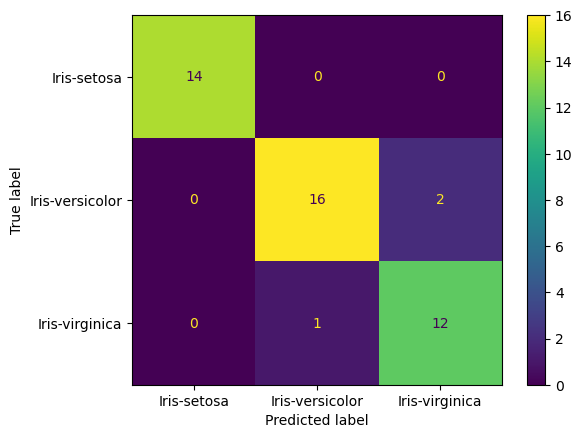

In [127]:
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
c_matrix_display = ConfusionMatrixDisplay(result,display_labels=label)
c_matrix_display.plot()

In [128]:
print(classification_report(y_test,y_pred, target_names=label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



## Support Vector Machines Model

In [129]:
# traning data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)


In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [131]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)
y_pred = model_svm.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [132]:
score = accuracy_score(y_test,y_pred)
score

0.9555555555555556

In [133]:
result = confusion_matrix(y_test,y_pred)
result

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

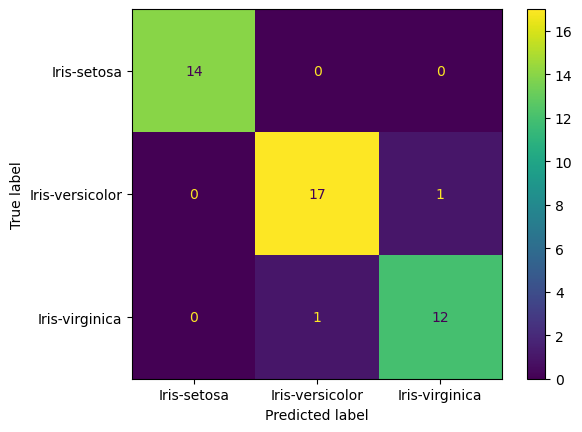

In [134]:
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']
c_matrix_display = ConfusionMatrixDisplay(result,display_labels=label)
c_matrix_display.plot()

In [135]:
print(classification_report(y_test,y_pred, target_names=label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [136]:
# save the models with the scaler
model_dict = {"scaler": scaler, "model_knn": model_knn, "model_rf": model_rf,
              "model_nv": model_nv, "model_svm": model_svm}
pickle.dump(model_dict, open("iris_prediction_model.pkl", "wb"))

In [139]:
# load the saved model
model_dict = pickle.load(open("iris_prediction_model.pkl", "rb"))
scaler = model_dict["scaler"]
model_knn = model_dict["model_knn"]
model_rf = model_dict["model_rf"]
model_nv = model_dict["model_nv"]
model_svm = model_dict["model_svm"]

# make a prediction using the loaded model
input_data = [[5.1, 3.5, 1.4, 0.2]]
input_data_scaled = scaler.transform(input_data)
prediction = model_rf.predict(input_data_scaled)[0]
print("Prediction:", prediction)

Prediction: Iris-setosa
